# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


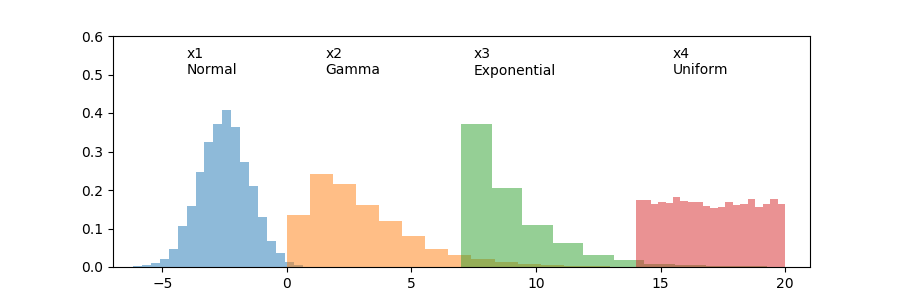

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


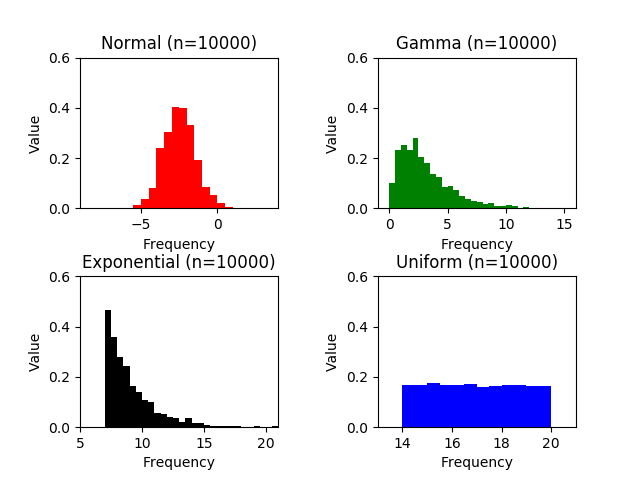

In [2]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

fig = plt.figure()
gspec = gridspec.GridSpec(2, 2)

# set the space between subplots and the position of the subplots in the figure
#gspec.update(wspace=0.4, hspace=0.45, left = 0.1, right = 0.7, bottom = 0.1, top = 0.9)
gspec.update(hspace=0.45, wspace=0.5)

normal_histogram = plt.subplot(gspec[0, 0])
gamma_histogram = plt.subplot(gspec[0, 1])
exponential_histogram = plt.subplot(gspec[1, 0])
uniform_histogram = plt.subplot(gspec[1, 1])
histograms = [normal_histogram, gamma_histogram, exponential_histogram, uniform_histogram]

axis_lims_normal = [-9, 4, 0, 0.6]
axis_lims_gamma = [-1, 16, 0, 0.6]
axis_lims_exponential = [5, 21, 0, 0.6]
axis_lims_uniform = [13, 21, 0, 0.6]
axis_lims = [axis_lims_normal, axis_lims_gamma, axis_lims_exponential, axis_lims_uniform]

bins_normal = np.arange(axis_lims_normal[0]-1, axis_lims_normal[1]+1, 0.5)
bins_gamma = np.arange(axis_lims_gamma[0]-1, axis_lims_gamma[1]+1, 0.5)
bins_exponential = np.arange(axis_lims_exponential[0]-1, axis_lims_exponential[1]+1, 0.5)
bins_uniform = np.arange(axis_lims_uniform[0]-1, axis_lims_uniform[1]+1, 0.5)
bins = [bins_normal, bins_gamma, bins_exponential, bins_uniform]

colors = ['r', 'g', 'k', 'b']

title_list = ['Normal', 'Gamma', 'Exponential', 'Uniform']

n = 10000
step_size = 500
x1 = np.random.normal(-2.5, 1, n)
x2 = np.random.gamma(2, 1.5, n)
x3 = np.random.exponential(2, n)+7
x4 = np.random.uniform(14,20, n)
xs = [x1, x2, x3, x4]

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a
    if curr == n: 
        a.event_source.stop()
    plt.cla()
    for (histo, bin_item, x, a_lim, title, col) in zip(histograms, bins, xs, axis_lims, title_list, colors):
        histo.hist(x[:curr], normed=True, bins=bin_item, color=col)
        histo.axis(a_lim)
        histo.set_title(title + ' (n={})'.format(curr))
        histo.set_xlabel('Frequency')
        histo.set_ylabel('Value')
    #plt.set_title('Sampling Several Distributions')
    #plt.set_ylabel('Frequency')
    #plt.set_xlabel('Value')
    #plt.annotate('n = {}'.format(curr), [3,27])
    
a = animation.FuncAnimation(fig, update, frames=np.arange(0, n + step_size, step_size), interval=100)


In [4]:
a.save('understanding distributions through sampling anim.mp4', fps=10, dpi=300)

/home/markandluann/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6201: RuntimeWarning: invalid value encountered in true_divide
  m = (m.astype(float) / db) / m.sum()
